# 📈 Regressão em Machine Learning: Do Básico ao Prático

<a href="https://colab.research.google.com/github/arnaldojr/DisruptiveArchitectures/blob/master/material/aulas/IA/lab03/regressao-basica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

## 🎯 Objetivos desta Aula

Nesta segunda aula de Machine Learning, você vai aprender:

- **O que é regressão** e quando usar
- **Diferença entre classificação e regressão**
- **Como implementar regressão linear** no scikit-learn
- **Como avaliar modelos** de regressão
- **Regressão polinomial** para relações não-lineares
- **Problemas de overfitting** e como evitar

---

## 🤔 O que você precisa saber antes

- ✅ Programação básica em Python
- ✅ Conceitos básicos de pandas e matplotlib
- ✅ O que é Machine Learning (aula anterior)
- ❌ **NÃO precisa** ser expert em estatística
- ❌ **NÃO precisa** conhecer scikit-learn profundamente

---

## 🔍 Regressão vs Classificação: Entendendo a Diferença

Na aula anterior, você aprendeu sobre **classificação** (como o KNN). Agora vamos aprender sobre **regressão**.

### 🎯 Qual a diferença?

| Aspecto | **Classificação** | **Regressão** |
|---------|------------------|---------------|
| **O que prediz?** | Categorias/Classes | Números contínuos |
| **Exemplos de saída** | "Gato" ou "Cachorro" | Preço: R$ 250.000 |
| | "Spam" ou "Não-spam" | Temperatura: 23.5°C |
| | "Aprovado" ou "Reprovado" | Altura: 1.75m |
| **Tipo de problema** | Discreto | Contínuo |

### 🏠 Exemplo Prático: Preço de Imóveis

**Problema**: Dado as características de uma casa (tamanho, localização, idade), qual será o **preço**?

- ✅ **É regressão** porque queremos predizer um **valor numérico** (preço)
- ❌ **Não é classificação** porque não queremos uma categoria

---

## 📐 Regressão Linear: A Matemática por trás (Simples!)

### 🤓 Lembra da equação da reta na escola?

```
y = a + b × x
```

A **regressão linear** é basicamente isso! Mas em ML chamamos de:

```
Preço = β₀ + β₁ × Tamanho
```

Onde:
- **β₀** (beta zero) = **intercepto** (onde a reta corta o eixo Y)
- **β₁** (beta um) = **coeficiente angular** (inclinação da reta)

### 🎯 Objetivo da Regressão

**Encontrar os melhores valores de β₀ e β₁** que fazem a reta passar o mais próximo possível de todos os pontos dos dados.

### 🏠 Exemplo Visual
```
Preço da Casa = 50.000 + 1.000 × Tamanho (m²)
```

- Casa de 100m² → Preço = 50.000 + 1.000 × 100 = **R$ 150.000**
- Casa de 200m² → Preço = 50.000 + 1.000 × 200 = **R$ 250.000**

---

## 📚 1. Importando as Bibliotecas

Antes de começar, vamos importar todas as ferramentas que vamos usar. **Não se preocupe em decorar**, você vai entender cada uma conforme formos usando!

In [1]:
# 📊 Para trabalhar com dados
import pandas as pd              # Trabalhar com tabelas (DataFrames)
import numpy as np              # Operações matemáticas e arrays

# 📈 Para criar gráficos
import matplotlib.pyplot as plt  # Gráficos básicos
import seaborn as sns           # Gráficos mais bonitos

# 🤖 Scikit-learn: nossa biblioteca principal de ML
from sklearn.datasets import fetch_california_housing  # Dataset de casas (substitui Boston)
from sklearn.model_selection import train_test_split   # Dividir dados treino/teste
from sklearn.linear_model import LinearRegression      # Algoritmo de regressão linear
from sklearn.preprocessing import PolynomialFeatures   # Para regressão polinomial

# 📏 Para avaliar nossos modelos
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 🎨 Configurações para gráficos ficarem bonitos
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

print("✅ Todas as bibliotecas importadas com sucesso!")
print("🚀 Vamos começar nossa jornada com regressão!")

✅ Todas as bibliotecas importadas com sucesso!
🚀 Vamos começar nossa jornada com regressão!


## 🏠 2. Carregando os Dados: Preços de Casas na Califórnia

Vamos usar um dataset sobre **preços de casas na Califórnia**. É perfeito para aprender regressão!

### 🎯 Nosso Objetivo
**Predizer o preço médio de casas** baseado em características como:
- Renda média da região
- Idade média das casas
- Número médio de quartos
- População da área
- E outras...

In [2]:
# 📦 Carregando o dataset da Califórnia
print("📥 Carregando dados...")
california_housing = fetch_california_housing()

# 📋 Criando um DataFrame (tabela) com os dados
df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)

# 🎯 Adicionando a coluna target (o que queremos predizer)
df['target'] = california_housing.target

print("✅ Dados carregados!")
print(f"📊 Tamanho do dataset: {df.shape[0]} linhas e {df.shape[1]} colunas")
print("\n🔍 Vamos dar uma olhada nos dados:")
df.head()

📥 Carregando dados...
✅ Dados carregados!
📊 Tamanho do dataset: 20640 linhas e 9 colunas

🔍 Vamos dar uma olhada nos dados:
✅ Dados carregados!
📊 Tamanho do dataset: 20640 linhas e 9 colunas

🔍 Vamos dar uma olhada nos dados:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### 📖 Entendendo as Colunas dos Dados

| Coluna | Significado | Exemplo |
|--------|-------------|---------|
| **MedInc** | Renda média da região | 8.32 (em dezenas de milhares) |
| **HouseAge** | Idade média das casas | 41.0 anos |
| **AveRooms** | Número médio de quartos | 6.98 quartos |
| **AveBedrms** | Número médio de quartos de dormir | 1.02 |
| **Population** | População da área | 322.0 pessoas |
| **AveOccup** | Ocupação média | 2.55 pessoas por casa |
| **Latitude** | Latitude geográfica | 37.88 |
| **Longitude** | Longitude geográfica | -122.23 |
| **target** | 🎯 **PREÇO** (o que queremos predizer) | 4.526 (em centenas de milhares) |

**💡 Dica**: O target está em centenas de milhares de dólares. Então 4.526 = $452,600

In [3]:
# 🔍 Informações gerais sobre o dataset
print("📋 INFORMAÇÕES GERAIS DO DATASET")
print("=" * 40)
df.info()

print("\n" + "=" * 40)
print("📊 ESTATÍSTICAS DESCRITIVAS")
print("=" * 40)
df.describe().round(2)

📋 INFORMAÇÕES GERAIS DO DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB

📊 ESTATÍSTICAS DESCRITIVAS


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57,2.07
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00,1.15
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35,0.15
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80,1.20
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49,1.80
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01,2.65
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31,5.00


In [4]:
# 🔍 Verificando se existem dados faltantes (muito importante!)
print("🚨 VERIFICANDO DADOS FALTANTES")
print("=" * 30)
dados_faltantes = df.isnull().sum()
print(dados_faltantes)

if dados_faltantes.sum() == 0:
    print("\n✅ Ótimo! Não temos dados faltantes.")
    print("📊 Isso facilita nossa análise!")
else:
    print(f"\n⚠️  Encontramos {dados_faltantes.sum()} dados faltantes.")
    print("💡 Precisaríamos tratar isso antes de continuar.")

🚨 VERIFICANDO DADOS FALTANTES
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

✅ Ótimo! Não temos dados faltantes.
📊 Isso facilita nossa análise!


## 📊 3. Análise Exploratória dos Dados (EDA)

**EDA = Exploratory Data Analysis**

Antes de treinar qualquer modelo, precisamos **conhecer nossos dados**! É como conhecer os ingredientes antes de cozinhar.

### 🎯 O que vamos fazer:
1. **Histogramas**: Ver como os dados estão distribuídos
2. **Boxplots**: Identificar outliers (valores estranhos)
3. **Scatter plots**: Ver relações entre variáveis

IndexError: list index out of range

/Users/arnaldoalvesvianajunior/DisruptiveArchitectures/.venv/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/arnaldoalvesvianajunior/DisruptiveArchitectures/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/arnaldoalvesvianajunior/DisruptiveArchitectures/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


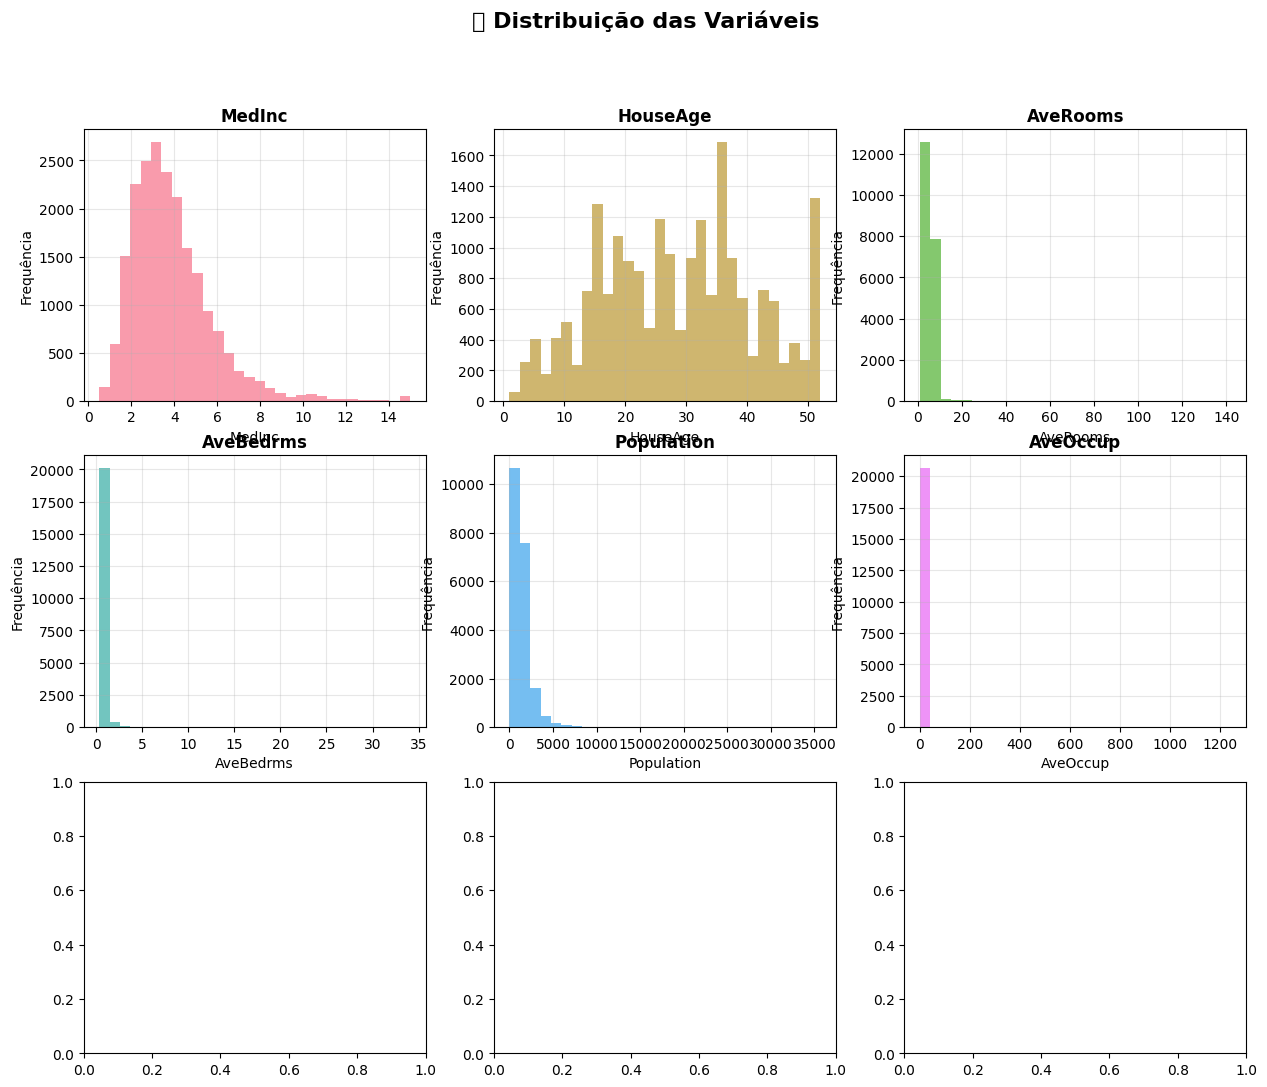

In [5]:
# 📊 Histogramas: Como os dados estão distribuídos?
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('📊 Distribuição das Variáveis', fontsize=16, fontweight='bold')

# Lista das colunas para plotar
colunas = df.columns

for i, coluna in enumerate(colunas):
    row = i // 3
    col = i % 3
    
    axes[row, col].hist(df[coluna], bins=30, alpha=0.7, color=sns.color_palette()[i])
    axes[row, col].set_title(f'{coluna}', fontweight='bold')
    axes[row, col].set_xlabel(coluna)
    axes[row, col].set_ylabel('Frequência')
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("💡 O que observar nos histogramas:")
print("• Distribuição normal (formato de sino) ou assimétrica?")
print("• Existem valores muito extremos (outliers)?")
print("• Os dados estão concentrados em alguma faixa?")